In [1]:
import pandas as pd 

df = pd.read_csv("CSV_Files/SPAM_v2.csv")
#checking missing values
df.isnull().sum() 

target    0
text      0
dtype: int64

In [2]:
#check duplicate values
df.duplicated().sum()

np.int64(0)

In [3]:
df.shape

(12, 2)

In [4]:
#Percantage of HAM and SPAM

values = df['target'].value_counts()
total = values.sum()

percentage_ham = (values[0]/total)*100
percentage_spam = (values[1]/total)*100

print(f"HAM MAIL RATIO {percentage_ham}\n\n"
      f"SPAM MAIL RATIO {percentage_spam}")

HAM MAIL RATIO 50.0

SPAM MAIL RATIO 50.0


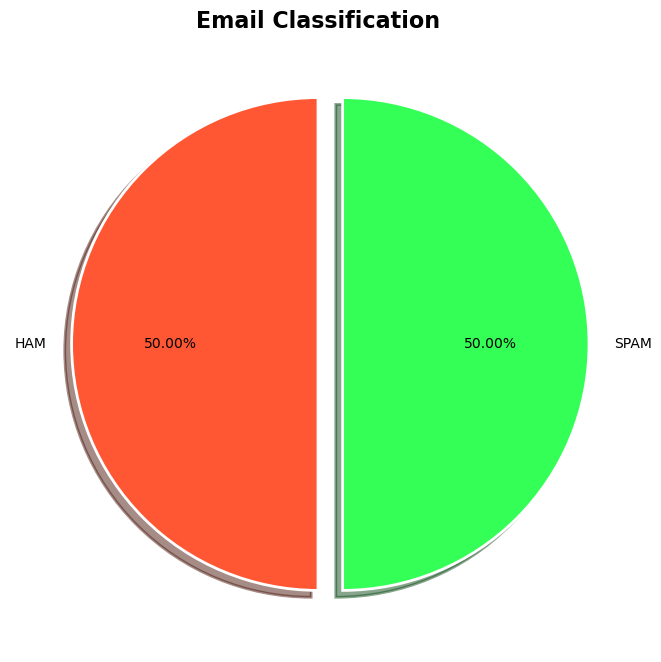

In [5]:
#Visualise The Data With Matplotlib.pyplot

import matplotlib.pyplot as plt

#give Colours
colors = ['#FF5733', '#33FF57']

#set background
plt.figure(figsize=(8, 8), facecolor='white') 

#set explode ratio to increase by 10%
explode = (0, 0.1)

#set percenatage to show them on pie chat 
Percentage = [percentage_ham, percentage_spam]

#add labels 
labels = ["HAM", "SPAM"]

#lets create pie chart 
plt.pie(
    Percentage,
    labels=labels,
    autopct='%0.2f%%', #to show percentage of piechart
    explode=explode,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    shadow=True,
    startangle=90 #set angle
)
plt.title("Email Classification",fontsize=16, fontweight='bold') #set title 
plt.show()


In [6]:
#For Handle Lookup Error 
# import nltk
# nltk.download('punkt')
# nltk.download('punkt_tab')  # some NLTK versions require this
# import nltk
# import shutil
# from pathlib import Path

# # Locate nltk_data path
# paths = nltk.data.path
# for p in paths:
#     tok_path = Path(p) / "tokenizers"
#     if tok_path.exists():
#         shutil.rmtree(tok_path, ignore_errors=True)

# # Reinstall tokenizers
# nltk.download('punkt')
# nltk.download('punkt_tab')


In [7]:
import nltk
from nltk.corpus import stopwords

df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))



In [8]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,12.000000,12.000000,12.0
mean,21.583333,4.750000,1.0
std,7.452374,2.050499,0.0
min,13.000000,3.000000,1.0
25%,17.250000,3.000000,1.0
50%,21.000000,4.500000,1.0
75%,23.250000,5.000000,1.0
max,41.000000,10.000000,1.0


In [9]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe() #ham

,num_characters,num_words,num_sentence
count,6.000000,6.000000,6.0
mean,19.833333,4.666667,1.0
std,4.915960,1.366260,0.0
min,14.000000,3.000000,1.0
25%,16.000000,4.000000,1.0
50%,20.000000,4.500000,1.0
75%,22.500000,5.000000,1.0
max,27.000000,7.000000,1.0


In [ ]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

df.to_csv("CSV_Files/spam_v3.csv")

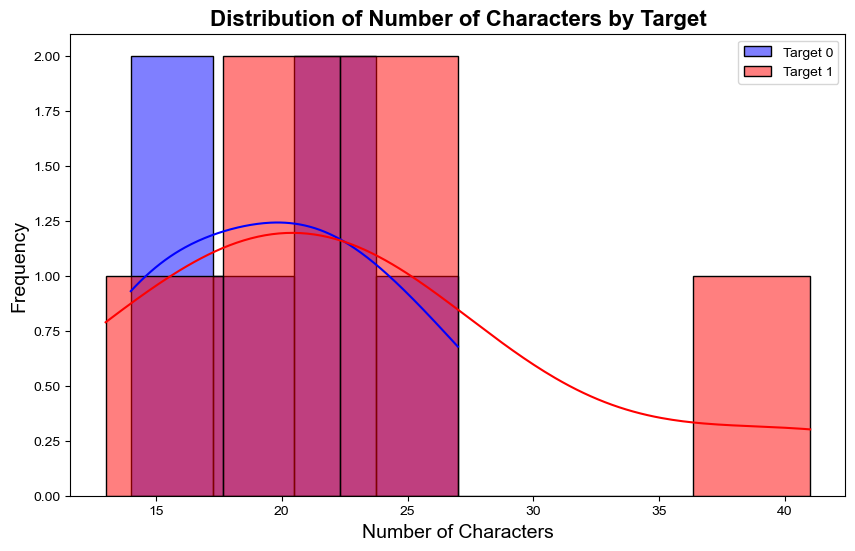

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()


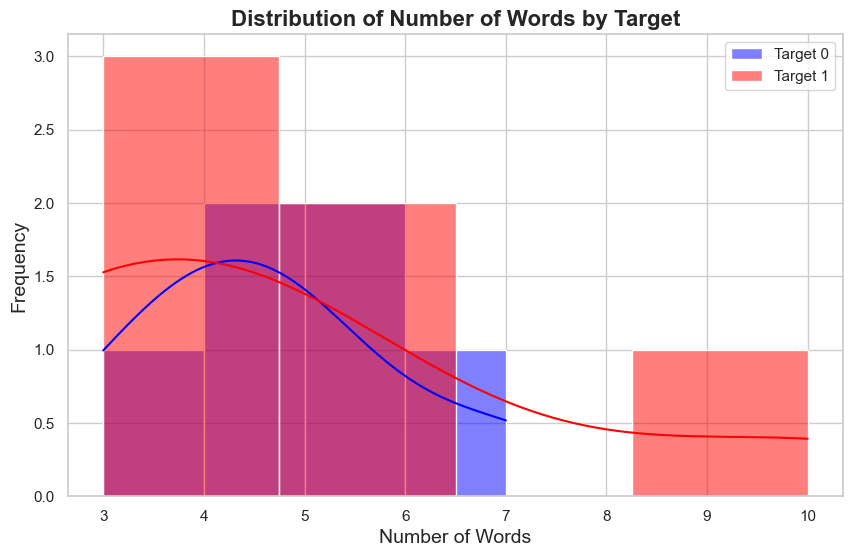

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()



In [13]:
#Corelation 

df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.245266,0.042448,NaN
num_characters,0.245266,1.000000,0.867085,NaN
num_words,0.042448,0.867085,1.000000,NaN
num_sentence,NaN,NaN,NaN,NaN


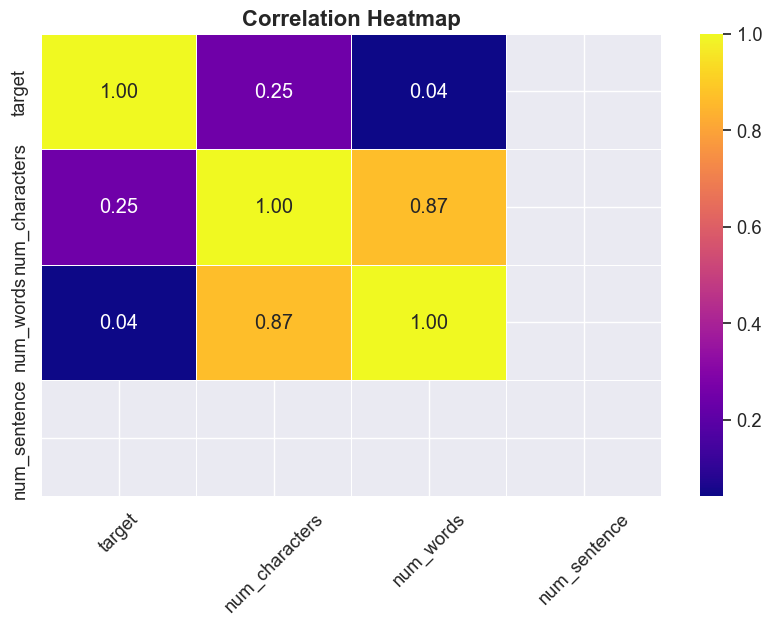

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set_theme(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()